In [1]:
path = r'C:\Users\Saurabh\Desktop\Summer20\IITB__Courses\ComputationalTools\Project\dataset\final\data2.csv'

# Dataset Generation

#### update in time definition, for maintained temperature at both ends

In [2]:
def update1(T, dx, dt, alpha):
    T_updated = [left_end_temp] # as left end temp is maintained
    for i in range(1, len(T)-1):
        T_i = (1 - 2*alpha*dt/dx**2) * T[i] + (alpha*dt/dx**2) * (T[i+1] + T[i-1])
        T_updated.append(T_i)
    T_updated.append(right_end_temp) # as right end temp is also maintained
    return np.array(T_updated)

#### definition to write csv file

In [3]:
def comma_sep(x):
    res = ''
    for y in x:
        res += str(y)
        res += ','
    return res[:-1]

In [4]:
header = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'dx', 'dt', 'alpha', 'Tl', 'Tr', 'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10']

In [5]:
[comma_sep(header)]

In [6]:
import csv
file = open('{}'.format(path), 'w', newline='')
csv_file = csv.writer(file, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
csv_file.writerow([comma_sep(header)])

In [7]:
alpha_copper = 1.11 * 1e-4
alpha_al = 9.7 * 1e-5
alpha_steel = 3.35 * 1e-6
alpha_glass = 3.4 * 1e-7
alpha_wood = 8.2 * 1e-8
#reference: https://www.engineersedge.com/heat_transfer/thermal_diffusivity_table_13953.htm

dx = 1e-2 # mesh spacing, keeping this constant throughout the model, just personal preference

import numpy as np
x = np.arange(0,0.1+dx,dx)

alpha = [alpha_copper, alpha_al, alpha_steel, alpha_glass, alpha_wood]
dt = np.round(np.array([(1/3 * dx**2)/alpha_x for alpha_x in alpha]),2)


print('alpha: ', alpha)
print('dt: ', dt)

alpha:  [0.00011100000000000001, 9.7e-05, 3.35e-06, 3.4e-07, 8.199999999999999e-08]
dt:  [3.000e-01 3.400e-01 9.950e+00 9.804e+01 4.065e+02]


In [8]:
for alpha_mat, dt_mat in zip(alpha, dt):
    for i in range(1, 9000):
        left_end_temp = int(np.round(np.random.rand(1) * 500, 2))
        right_end_temp = int(np.round(np.random.rand(1) * 500, 2))
        T_old = [int(np.round(np.random.rand(1) * 500, 2))] * 11
        
        count = 0
        
        for j in range(201):
            T_new = np.round(update1(T_old, dx, dt_mat, alpha_mat), 2)
            if count % 10 == 0:
                csv_file.writerow([comma_sep(np.hstack((T_old, [dx, dt_mat, alpha_mat, left_end_temp, right_end_temp], T_new)))])
            count += 1
            T_old = T_new

print("___Dataset_Generated___" * 5)

___Dataset_Generated______Dataset_Generated______Dataset_Generated______Dataset_Generated______Dataset_Generated___


In [9]:
file.close() 

# Importing the generated Dataset

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('{}'.format(path))

In [12]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,145.0,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,...,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,168.0
1,447.0,354.19,274.23,215.10,177.97,158.77,151.55,151.33,155.01,160.95,...,358.47,281.17,222.43,183.94,162.76,153.88,152.63,155.76,161.32,168.0
2,447.0,381.40,320.65,268.66,227.71,198.32,179.52,169.37,165.57,165.81,...,383.02,323.57,272.34,231.56,201.85,182.40,171.48,166.92,166.46,168.0
3,447.0,393.87,343.48,298.22,259.78,229.02,205.93,189.78,179.24,172.62,...,394.78,345.19,300.49,262.34,231.57,208.24,191.65,180.55,173.29,168.0
4,447.0,401.44,357.68,317.31,281.56,251.15,226.26,206.53,191.09,178.74,...,402.04,358.81,318.85,283.34,252.99,227.98,207.96,192.12,179.28,168.0


In [13]:
df.shape

(944895, 27)

In [14]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
count,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,...,944895.000000,944895.000000,944895.000000,944895.00000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000,944895.000000
mean,249.768426,249.765094,249.757000,249.740154,249.711670,249.669726,249.613221,249.541875,249.456638,249.360330,...,249.763504,249.754080,249.736270,249.70718,249.664876,249.608274,249.537246,249.452950,249.358259,249.197466
std,144.471541,128.155848,115.784773,107.584899,103.066794,101.662229,103.142340,107.723584,115.962327,128.340771,...,128.275787,115.841318,107.488802,102.84828,101.401521,102.924024,107.627302,116.017885,128.459530,144.652584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.000000,141.040000,154.650000,165.075000,173.600000,176.400000,173.330000,164.660000,153.880000,140.210000,...,140.890000,154.520000,165.150000,173.78000,176.570000,173.490000,164.720000,153.790000,140.000000,124.000000
50%,249.000000,249.420000,249.500000,249.720000,249.730000,249.750000,249.720000,249.760000,249.370000,249.150000,...,249.420000,249.490000,249.680000,249.71000,249.730000,249.710000,249.760000,249.350000,249.160000,249.000000
75%,375.000000,359.110000,345.070000,334.130000,325.480000,322.630000,325.600000,333.790000,344.900000,359.160000,...,359.330000,345.170000,334.050000,325.29000,322.440000,325.420000,333.720000,345.000000,359.390000,375.000000
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000,500.000000


In [15]:
#check if there are any null values in the populated dataset
df.isnull().values.any()

False

In [16]:
x = df.iloc[:, :16]

In [17]:
x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,dx,dt,alpha,Tl,Tr
0,145.0,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.0,0.01,0.3,1.110000e-04,447.0,168.0
1,447.0,354.19,274.23,215.10,177.97,158.77,151.55,151.33,155.01,160.95,168.0,0.01,0.3,1.110000e-04,447.0,168.0
2,447.0,381.40,320.65,268.66,227.71,198.32,179.52,169.37,165.57,165.81,168.0,0.01,0.3,1.110000e-04,447.0,168.0
3,447.0,393.87,343.48,298.22,259.78,229.02,205.93,189.78,179.24,172.62,168.0,0.01,0.3,1.110000e-04,447.0,168.0
4,447.0,401.44,357.68,317.31,281.56,251.15,226.26,206.53,191.09,178.74,168.0,0.01,0.3,1.110000e-04,447.0,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944890,150.0,138.26,126.49,114.65,102.71,90.67,78.51,66.25,53.89,41.46,29.0,0.01,406.5,8.200000e-08,150.0,29.0
944891,150.0,138.16,126.30,114.38,102.41,90.35,78.21,65.98,53.70,41.36,29.0,0.01,406.5,8.200000e-08,150.0,29.0
944892,150.0,138.09,126.16,114.19,102.18,90.11,77.98,65.79,53.56,41.29,29.0,0.01,406.5,8.200000e-08,150.0,29.0
944893,150.0,138.04,126.06,114.06,102.02,89.94,77.82,65.66,53.46,41.24,29.0,0.01,406.5,8.200000e-08,150.0,29.0


In [18]:
y = df.iloc[:, 16:]

In [19]:
y

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,447.0,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,145.00,168.0
1,447.0,358.47,281.17,222.43,183.94,162.76,153.88,152.63,155.76,161.32,168.0
2,447.0,383.02,323.57,272.34,231.56,201.85,182.40,171.48,166.92,166.46,168.0
3,447.0,394.78,345.19,300.49,262.34,231.57,208.24,191.65,180.55,173.29,168.0
4,447.0,402.04,358.81,318.85,283.34,252.99,227.98,207.96,192.12,179.28,168.0
...,...,...,...,...,...,...,...,...,...,...,...
944890,150.0,138.25,126.47,114.62,102.68,90.63,78.48,66.22,53.87,41.45,29.0
944891,150.0,138.15,126.28,114.36,102.38,90.32,78.18,65.96,53.68,41.35,29.0
944892,150.0,138.08,126.15,114.18,102.16,90.09,77.96,65.78,53.55,41.28,29.0
944893,150.0,138.03,126.05,114.05,102.01,89.93,77.81,65.65,53.45,41.23,29.0


# ANN Implementation using sklearn library

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)
#testing set as 5 % of the total data, as we have around 1 million instances, around 50,000 will be alloted for testing purpose

## training part

#### Regressor

In [21]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (12), max_iter = 200, solver = 'adam', alpha = 0.001, learning_rate = 'adaptive', activation = 'relu')

#### Training the model

In [22]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
mlp.fit(X_train, y_train)
print('__Trained__' * 5)

__Trained____Trained____Trained____Trained____Trained__


In [23]:
pd.DataFrame(mlp.loss_curve_).plot()

## prediction on test data

In [24]:
predictions = mlp.predict(X_test)
pd.DataFrame(np.round(predictions,2))

,0,1,2,3,4,5,6,7,8,9,10
0,488.91,470.52,452.22,433.93,415.90,398.08,380.47,363.18,346.01,328.94,312.03
1,114.95,148.28,181.62,214.86,248.12,281.33,314.50,347.69,380.80,413.89,447.01
2,228.96,214.02,199.00,183.79,168.39,152.73,136.79,120.62,104.22,87.64,71.01
3,43.96,76.94,109.91,142.74,175.52,208.17,240.71,273.16,305.50,337.76,370.01
4,182.95,188.70,194.46,200.18,205.95,211.74,217.54,223.40,229.25,235.11,241.01
...,...,...,...,...,...,...,...,...,...,...,...
47240,10.49,12.25,12.70,15.62,22.01,39.32,70.98,129.25,217.28,335.21,467.54
47241,113.97,118.41,122.99,127.86,133.13,138.87,145.13,151.86,158.99,166.41,174.00
47242,295.95,290.67,284.36,275.94,264.83,250.44,232.58,211.59,187.74,161.88,135.01
47243,288.95,269.04,249.21,229.46,209.92,190.61,171.52,152.67,134.00,115.45,97.01


## Test Set data

In [25]:
y_test

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
910740,489.0,470.58,452.23,434.02,415.98,398.17,380.58,363.22,346.03,328.98,312.0
672772,115.0,148.32,181.63,214.92,248.18,281.40,314.58,347.72,380.83,413.92,447.0
579270,229.0,214.04,199.01,183.82,168.42,152.76,136.83,120.64,104.23,87.66,71.0
356657,44.0,76.98,109.92,142.79,175.56,208.22,240.76,273.19,305.52,337.78,370.0
102857,183.0,188.73,194.47,200.23,206.00,211.79,217.60,223.43,229.27,235.13,241.0
...,...,...,...,...,...,...,...,...,...,...,...
175540,11.0,11.68,12.69,15.12,21.73,37.80,71.06,129.69,218.55,335.32,469.0
51523,114.0,118.43,123.01,127.88,133.16,138.91,145.16,151.88,159.01,166.43,174.0
587020,296.0,290.71,284.36,276.00,264.87,250.48,232.67,211.60,187.76,161.91,135.0
393868,289.0,269.07,249.22,229.50,209.96,190.65,171.56,152.70,134.02,115.47,97.0


In [26]:
X_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,dx,dt,alpha,Tl,Tr
910740,489.0,470.56,452.19,433.95,415.91,398.09,380.51,363.15,345.99,328.96,312.0,0.01,406.50,8.200000e-08,489.0,312.0
672772,115.0,148.32,181.64,214.93,248.19,281.41,314.59,347.73,380.84,413.92,447.0,0.01,98.04,3.400000e-07,115.0,447.0
579270,229.0,214.07,199.06,183.90,168.51,152.85,136.92,120.72,104.29,87.69,71.0,0.01,98.04,3.400000e-07,229.0,71.0
356657,44.0,76.99,109.94,142.82,175.60,208.26,240.80,273.22,305.54,337.79,370.0,0.01,0.34,9.700000e-05,44.0,370.0
102857,183.0,188.73,194.47,200.22,205.99,211.78,217.59,223.42,229.27,235.13,241.0,0.01,0.30,1.110000e-04,183.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175540,11.0,11.64,12.40,14.04,18.92,32.23,62.28,118.71,208.10,328.87,469.0,0.01,0.30,1.110000e-04,11.0,469.0
51523,114.0,118.37,122.91,127.74,133.00,138.74,145.00,151.74,158.91,166.37,174.0,0.01,0.30,1.110000e-04,114.0,174.0
587020,296.0,291.07,285.05,276.95,265.99,251.66,233.79,212.55,188.45,162.27,135.0,0.01,98.04,3.400000e-07,296.0,135.0
393868,289.0,269.05,249.17,229.43,209.89,190.57,171.49,152.63,133.97,115.45,97.0,0.01,9.95,3.350000e-06,289.0,97.0


## Model Performance Statistics

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE: ', mean_squared_error(y_test, pd.DataFrame(np.round(predictions,2))))
print('R2: ', r2_score(y_test, predictions, sample_weight=None, multioutput='uniform_average'))

MSE:  0.004185203821472267
R2:  0.9999996669591181


# Custom Check

## one sample check

In [39]:
dx = dx
#let's check for steel sample or enter the relevant value for any sample in general
dt1 = dt[2]
alpha1 = alpha[2]
left_end_temp = int(np.round(np.random.rand(1) * 500, 2))
right_end_temp = int(np.round(np.random.rand(1) * 500, 2))

In [40]:
#T_initial = [int(np.round(np.random.rand(1) * 500, 2))] * 11
T_initial = [int(np.round(np.random.rand(1) * 500, 2))] * 11
T_sample = np.array(np.hstack((T_initial, [dx, dt1, alpha1, left_end_temp, right_end_temp])))
print(T_sample)

[3.69e+02 3.69e+02 3.69e+02 3.69e+02 3.69e+02 3.69e+02 3.69e+02 3.69e+02
 3.69e+02 3.69e+02 3.69e+02 1.00e-02 9.95e+00 3.35e-06 1.71e+02 3.29e+02]


## after 1 unit of dt

### predicted

In [41]:
T_pred = np.round(mlp.predict(T_sample.reshape(1,-1)),2)
print(T_pred)

[[170.92 368.95 368.99 368.93 368.93 368.93 368.91 368.97 368.97 368.97
  329.02]]


### from update rule

In [42]:
T_sim = np.round(update1(T_initial, dx, dt1, alpha1),2)
print(T_sim)

[171. 369. 369. 369. 369. 369. 369. 369. 369. 369. 329.]


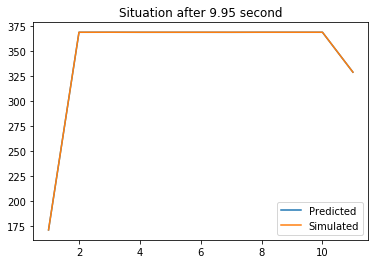

In [43]:
import matplotlib.pyplot as plt
x1 = np.arange(1,12,1)
y1 = T_pred.reshape(11,1)
plt.plot(x1,y1, label = 'Predicted')
plt.plot(x1, T_sim, label = 'Simulated')
plt.legend()
plt.title('Situation after {} second'.format(round(dt1,2)))
plt.show()

## After time t

### predicted

In [47]:
t = 10000
t_tot = 0
n = int(t/dt1)
T_old = T_sample.reshape(1,-1)
import time
t1 = time.time()
for i in range(n):
    T_new = np.round(mlp.predict(T_old),2)
    T_old = np.array(np.hstack((T_new, np.array([[dx, dt1, alpha1, left_end_temp, right_end_temp]]))))
t2 = time.time()
print('Scenario after {} unit of time'.format(round(dt1*n,2)))
print(T_new)

Scenario after 9999.75 unit of time
[[170.96 186.17 201.49 216.85 232.38 248.07 263.94 280.03 296.24 312.58
  329.01]]


### from update rule

In [48]:
T_old = T_initial
t3 = time.time()
for i in range(n):
    T_new1 = np.round(update1(T_old, dx, dt1, alpha1),2)
    T_old = T_new1
t4 = time.time()
print(T_new1)

[171.   186.84 202.67 218.49 234.3  250.1  265.9  281.69 297.47 313.24
 329.  ]


Text(0.5, 1.0, 'Situation after 9999.75 s')

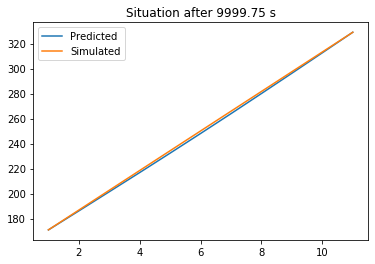

In [49]:
plt.plot(x1, T_new.reshape(11,1), label = 'Predicted')
plt.plot(x1, T_new1, label = 'Simulated')
plt.legend()
plt.title('Situation after {} s'.format(round(dt1*n, 2)))

In [51]:
print('Prediction Time: ', round((t2-t1)*1000,2), 'ms')
print('Simulation Time: ', round((t4-t3)*1000,2), 'ms')

Prediction Time:  76.79 ms
Simulation Time:  36.93 ms
